In [1]:
%reset -f 
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from pymatgen import MPRester
from lib.module1 import *

In [2]:
mpr = MPRester('JCRhEVIMvKOrQ1ot')  # put your Materials Project API key here

<IPython.core.display.Javascript object>


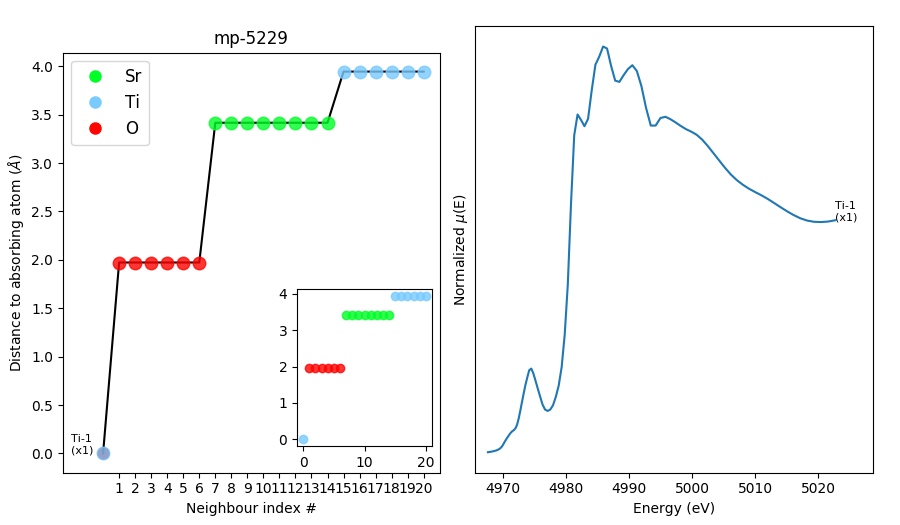

In [3]:
get_XANES(mpr,mpid='mp-5229',absorbing_atom='Ti')

<IPython.core.display.Javascript object>


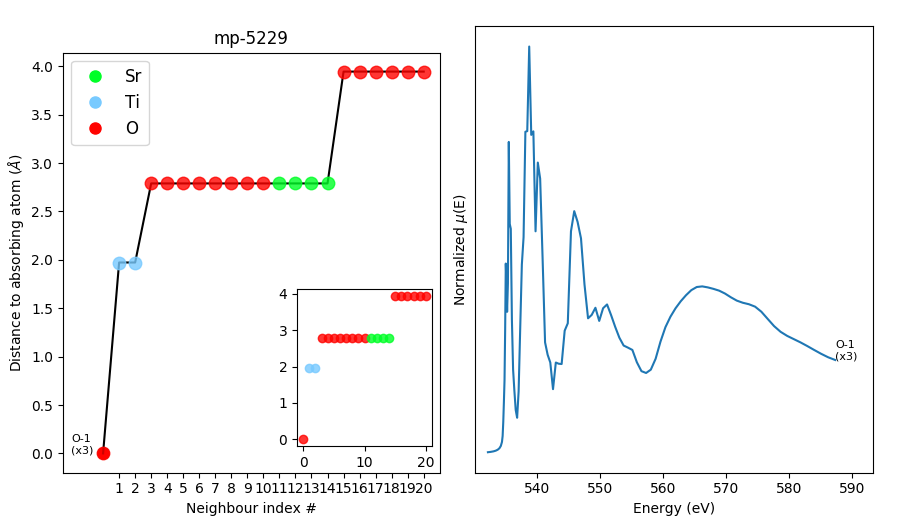

In [4]:
get_XANES(mpr,mpid='mp-5229',absorbing_atom='O',export_figure=True)

running feff at /home/mt/gd/research/ACTIVE/NSLS-II-service/t4iss/data/XANES/mvc-11115/feff_001_Ti
running feff at /home/mt/gd/research/ACTIVE/NSLS-II-service/t4iss/data/XANES/mvc-11115/feff_002_Ti


<IPython.core.display.Javascript object>


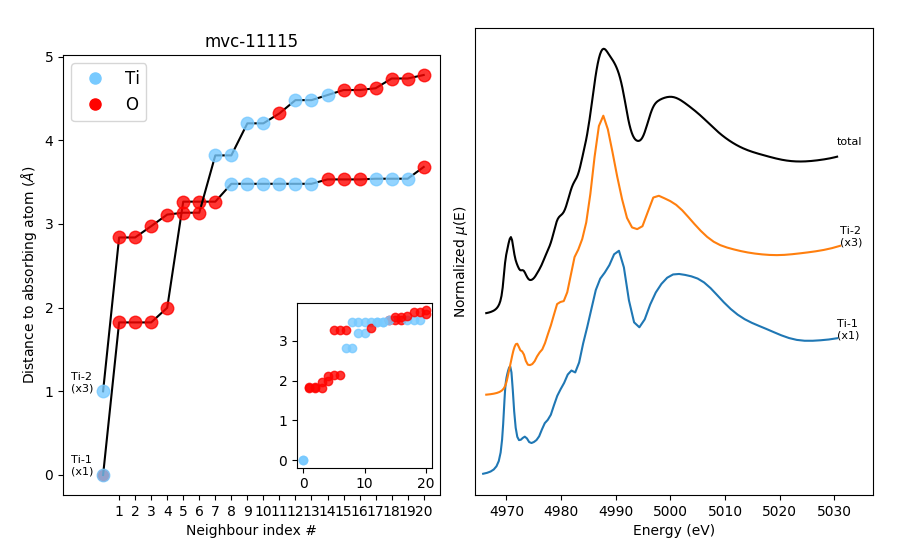

In [5]:
get_XANES(mpr,mpid='mvc-11115',absorbing_atom='Ti',run_feff=True,export_figure=True)

Found 7 structures


<IPython.core.display.Javascript object>


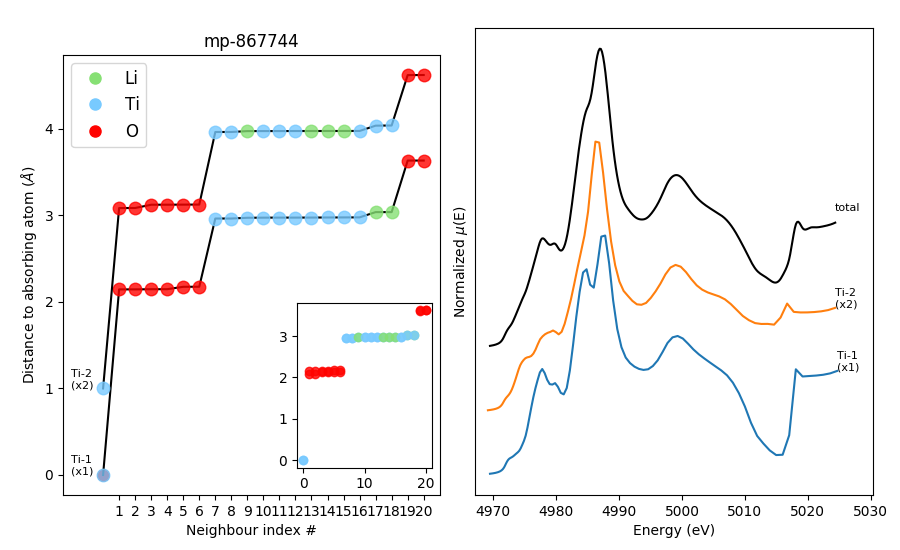

<IPython.core.display.Javascript object>


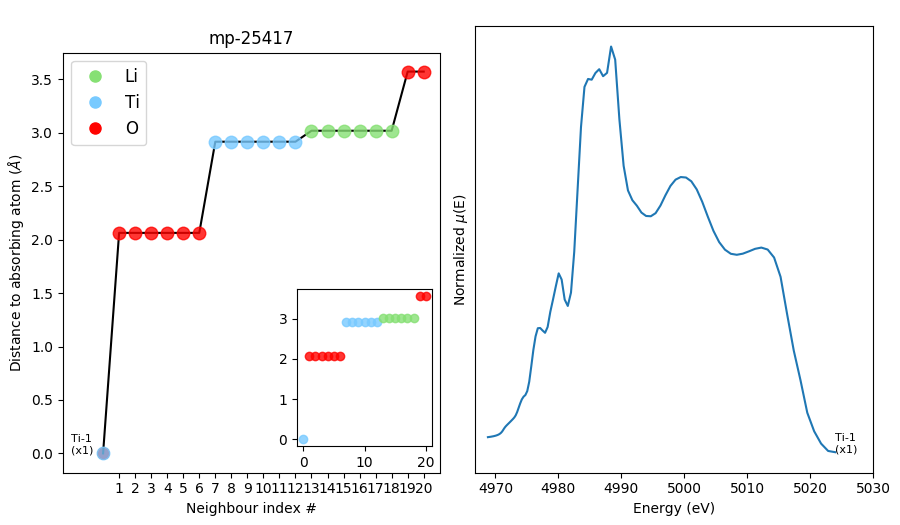

<IPython.core.display.Javascript object>


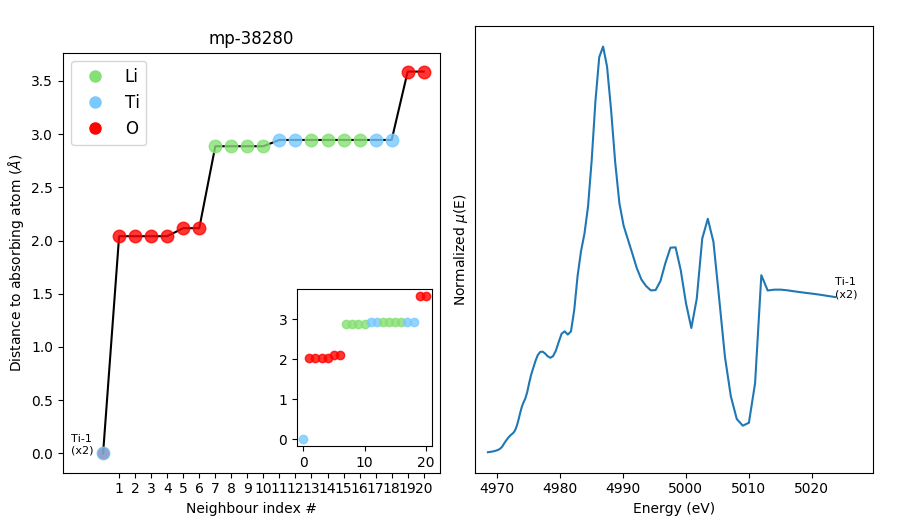

<IPython.core.display.Javascript object>


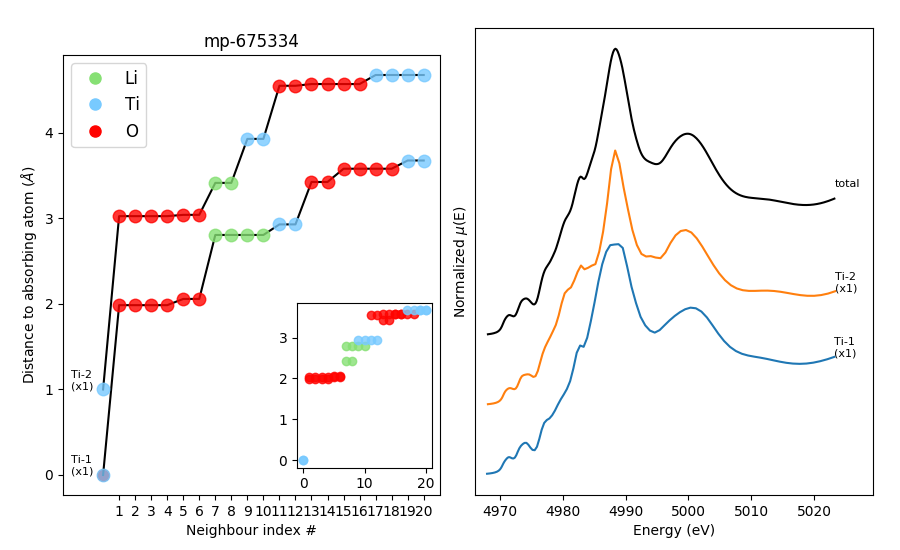

XANES is not available in MP or local database.


<IPython.core.display.Javascript object>


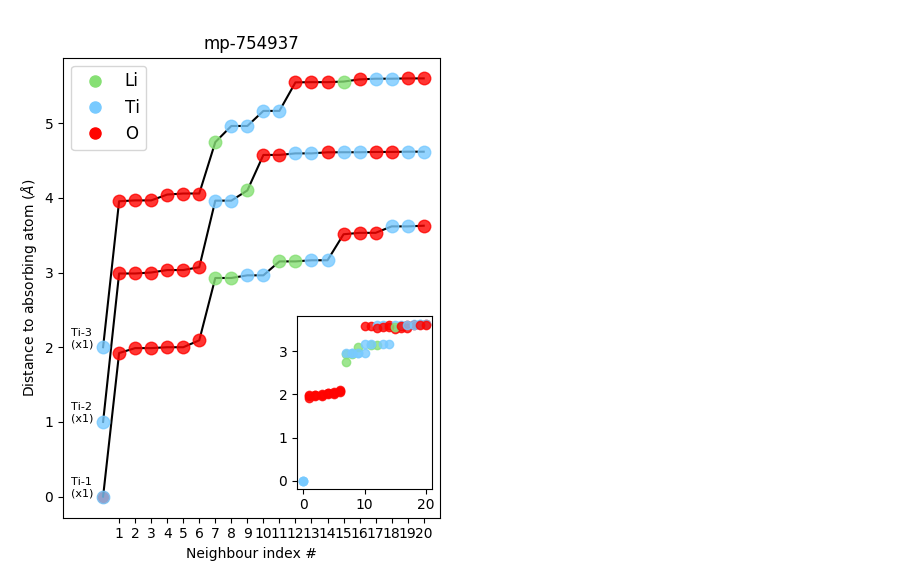

XANES is not available. Try "run_feff=True"


In [6]:
# search in MP
mpid_list = search_MP(mpr,search_pattern='Li-Ti-O',nmax=10)

# plot first 5
for s in mpid_list[0:5]:
    get_XANES(mpr,mpid=s,absorbing_atom='Ti')